
# GapMinder CO2 Emissions Data - Carbon Dioxide Analysis and Driver Exploration

## Udacity Data Analytics Nano Degree | Project 1 - Data Wrangling

### By: Cory Robbins |  Jan 15, 2021


# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# Introduction

In this project we investigate the Gapminder CO2 emissions data as well as other variables; life expectency, population, gdp, and, income - all variable data sets are known drivers of CO2 emissions --  we then compare with data of airline carrier departures and passanger flights to help us understand CO2 emissions.

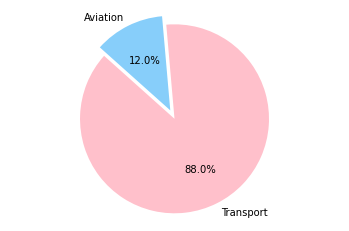

In [1]:
import matplotlib.pyplot as plt
#Pie chart showing 
labels = 'Aviation', 'Transport'
sizes = [12, 88]
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=95)
plt.axis('equal')
plt.show()


### Gapminder Data sets used 

* Countries-Continents.csv
* life_expectancy_years.csv
* population_total.csv
* total_gdp_ppp_inflation_adjusted.csv
* co2_emissions_tonnes_per_person.csv
* consumption_co2_emissions_1000_tonnes.csv
* income_per_person_gdppercapita_ppp_inflation_adjusted.csv
* air_dprt.csv
* air_psgr.csv

In late 2020 Airbus announced three new Hydrogen, "zero-emission' concept aircrafts, each representing a different approach to exploring various technology pathways towards meeting future climate-neutral targets as set by the company and in accorence with European Green Deal standards. The company expressed that the time is prime for new develoment in areas such as Hydrogen to take hold so that companies such as Airbus and the overall industry governments can work in accordance to meet innovation requirments and move towards an entirely new way to fly by 2030.

> https://ec.europa.eu/info/strategy/priorities-2019-2024/european-green-deal_en 

We hope to gain insights into known drivers of CO2 emissions across countries and regions including identify potential connections between known driving indicators of increased CO2 emissions as well as flight data and see how total passangers and total departures.  

Natrurally, I wanted to check if there are any potential relationship beween flights and CO2 emissions, but before we analyze flights we pulled in known variables life expectancy, gdp, population and income. 

Questions we would like to answer in this exploration are the following:

* Can we generalize something about the top-25 CO2 emitting countries?  
* Can we identify which variables are correlated or strong associated with CO2 emissions?
* Can we prodice a correlation coefficient heatmap?
* Can we plot the variables in a bubble plotto play with the data?


In [2]:
# In this cell are the import statements for all of the packages used

import plotly
import numpy as np
import pandas as pd
import itertools 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# %matplotlib inline

pd.options.display.float_format = "{:,.2f}".format

<a id='wrangling'></a>
# Data Wrangling

In this section of the report, the data is laoded, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


### importing CSV files 
including a list of continents grouped counties by continents for further analysis

In [3]:
path = '/Users/coryrobbins/Desktop/project1/gapminder_data/'

continents = pd.read_csv(path + 'Countries-Continents.csv')
continents.set_index("Country", inplace=True)

co2 = pd.read_csv(path + 'co2_emissions_tonnes_per_person.csv', index_col='country')


income = pd.read_csv(path + 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col='country')
life = pd.read_csv(path + 'life_expectancy_years.csv', index_col='country')
population = pd.read_csv(path + 'population_total.csv', index_col='country')
gdp = pd.read_csv(path + 'total_gdp_ppp_inflation_adjusted.csv', index_col='country')

consumption = pd.read_csv(path + 'consumption_co2_emissions_1000_tonnes.csv', index_col='country')
dprt =pd.read_csv(path + 'is_air_dprt.csv', index_col='country')
psgr =pd.read_csv(path + 'is_air_psgr.csv', index_col='country')


In [4]:
all_data = {
    'co2' : co2,
    
    'income' : income,
    'life' : life,
    'population' : population,
    'gdp' : gdp,
}
"""
    'consumption' : consumption,
    'dprt' : dprt,
    'psgr' : psgr,
"""


all_data = {name:value.transpose() for name, value in all_data.items()}

### transforming the data 


Now we want a flatten (tall and skinny) representation of the data 
to be more similar to other online resoources.

For this we need the stack / unstack operations. 

In [5]:
all_data.keys()
all_data['continent'] = continents #['Continent']
# means['continent'] = continents['Continent']

### stacking the data 

In [6]:

name = "life"
datanow = all_data[name].transpose()
datanow["continent"] = all_data["continent"]
datanow = datanow.reset_index().set_index(['country', 'continent'])
# datanow = datanow.transpose()

datanow = (
    datanow
        .stack()
        .reset_index()
        .rename(columns={"level_2":"year", 0:name})
        .set_index( ["continent", "country", "year"]) #.transpose()
)
datanow.astype(int) 

life
continent country     year      
Asia      Afghanistan 1800    28
                      1801    28
                      1802    28
                      1803    28
                      1804    28
...                          ...
Africa    Zimbabwe    2096    75
                      2097    75
                      2098    75
                      2099    75
                      2100    75

[55528 rows x 1 columns]

### combining the data into its own DataFrame

In [7]:
combined = pd.DataFrame()
for name in all_data:
    if name  == "continent":
        continue
    datanow = all_data[name].transpose()
    datanow["continent"] = all_data["continent"]
    datanow = datanow.reset_index().set_index(['country', 'continent'])
    # datanow = datanow.transpose()
    datanow = (
        datanow
        .stack()
        .reset_index()
        .rename(columns={"level_2":"year", 0:name})
        .set_index( ["continent", "country", "year"]) #.transpose()
    )
    combined[name] = datanow[name] 
combined.head()
combined = combined.reset_index()#.fillna(0)
combined.sample(n=20)

continent             country  year   co2    income  life  \
3389   South America               Chile  1962  1.97  6,170.00 58.80   
6716          Africa              Guinea  2012  0.23  1,780.00 58.30   
11683            NaN     North Macedonia  2008  4.55 11,000.00 75.40   
12693         Europe              Poland  1975 11.00 11,500.00 71.00   
7277            Asia               India  1878  0.01    723.00 20.00   
15458           Asia               Syria  1977  1.82  4,230.00 66.90   
10497           Asia            Mongolia  1998  3.27  4,540.00 61.20   
4924          Africa               Egypt  1971  0.65  3,270.00 51.70   
15237         Europe              Sweden  2005  5.96 41,300.00 80.60   
2807            Asia            Cambodia  1981  0.04    798.00 53.10   
16638         Europe             Ukraine  1889  0.21  1,200.00 36.50   
800          Oceania           Australia  1927  4.80 10,100.00 63.00   
4759   North America  Dominican Republic  2016  2.37 14,500.00 72.80   
2581          Europe            Bulgaria  1940  0.62  2,930.00 52.50   
3961             NaN       Cote d'Ivoire  1969  0.39  4,170.00 49.80   
17596  South America           Venezuela  1930  0.00  3,300.00 33.30   
16515        Oceania              Tuvalu  2002  1.15  3,280.00   nan   
252           Africa             Algeria  2006  2.98 12,400.00 75.50   
3498            Asia               China  1953  0.23    924.00 44.50   
12384  South America                Peru  1994  0.97  5,840.00 71.20   

       population                gdp  
3389      8480000  49,800,000,000.00  
6716     10700000  12,700,000,000.00  
11683     2070000  23,100,000,000.00  
12693    34000000 388,000,000,000.00  
7277    260000000 162,000,000,000.00  
15458     8060000  27,200,000,000.00  
10497     2360000   8,940,000,000.00  
4924     35300000 131,000,000,000.00  
15237     9040000 352,000,000,000.00  
2807      6750000   5,560,000,000.00  
16638    21200000  26,400,000,000.00  
800       6020000  54,800,000,000.00  
4759     10400000                nan  
2581      6660000  18,000,000,000.00  
3961      4900000  18,000,000,000.00  
17596     3590000  16,200,000,000.00  
16515        9590      42,100,000.00  
252      33600000 399,000,000,000.00  
3498    593000000 498,000,000,000.00  
12384    23900000 150,000,000,000.00

In [8]:
list(combined)

['continent', 'country', 'year', 'co2', 'income', 'life', 'population', 'gdp']

In [9]:
combined.groupby('continent').mean()

co2    income  life    population                gdp
continent                                                          
Africa        0.89  3,698.60 53.07 11,801,417.93  39,238,976,864.49
Asia          5.16 13,256.68 54.31 71,474,855.70 281,981,128,982.90
Europe        4.17 11,170.86 57.36 13,115,810.07 151,506,128,864.06
North America 3.46  8,200.75 63.15  7,722,918.67  86,712,467,902.05
Oceania       3.40  9,048.98 61.71  2,416,283.92  43,774,635,180.72
South America 1.70  7,102.58 58.17 17,946,754.58 143,677,907,180.39

In [10]:
combined.dtypes

continent      object
country        object
year           object
co2           float64
income        float64
life          float64
population      int64
gdp           float64
dtype: object

In [11]:
combined['year'].dtype

dtype('O')

### NaN  'not a number'  
using .isna() and .sum() to compare with the shape to analyze the number of missing-values

In [12]:
combined.isna().sum()

continent     1831
country          0
year             0
co2              0
income          29
life           200
population       0
gdp            978
dtype: int64

In [13]:
combined.shape

(18039, 8)

### missingno is a missing data visualization module for Python

In [14]:
#importing missingn package
import missingno as msno

<AxesSubplot:>

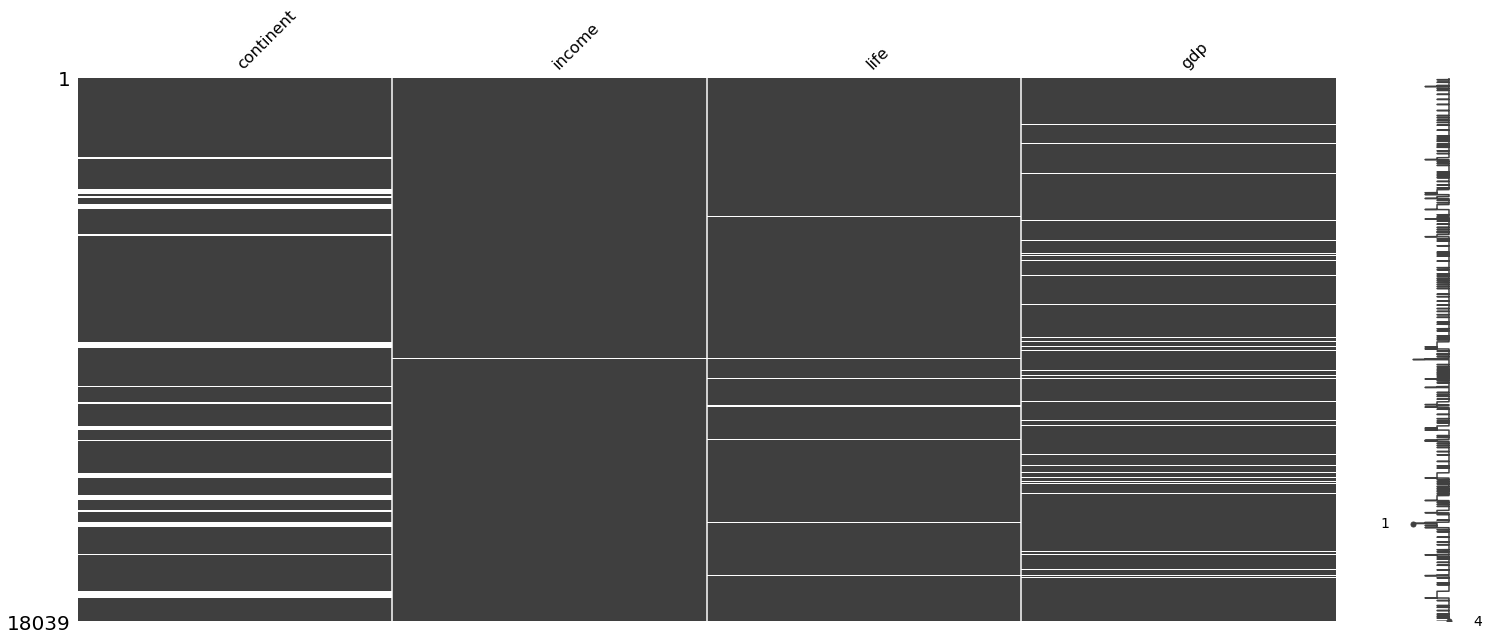

In [15]:
missingdata_df = combined.columns[combined.isnull().any()].tolist()
msno.matrix(combined[missingdata_df])

In [16]:
#Drop NA values where cells have NAs and filled them with zero
combined_filled = combined.fillna(0)

In [17]:
filled_zeros = combined.fillna(0)

In [18]:
filled_zeros.sort_values(["year", "co2",], ascending=False)

continent               country  year   co2     income  life  \
12955           Asia                 Qatar  2018 38.00 113,000.00 80.30   
16086  North America   Trinidad and Tobago  2018 31.30  28,600.00 74.40   
8770            Asia                Kuwait  2018 23.70  65,500.00 83.20   
16827           Asia  United Arab Emirates  2018 21.40  66,600.00 73.50   
1414            Asia               Bahrain  2018 19.80  42,000.00 79.60   
...              ...                   ...   ...   ...        ...   ...   
16828         Europe        United Kingdom  1800  2.48   3,280.00 38.60   
12518         Europe                Poland  1800  0.05   1,100.00 35.90   
6089          Europe               Germany  1800  0.04   1,990.00 38.40   
17047              0         United States  1800  0.04   1,980.00 39.40   
2914   North America                Canada  1800  0.01   1,310.00 39.00   

       population               gdp  
12955     2780000              0.00  
16086     1390000              0.00  
8770      4140000              0.00  
16827     9630000              0.00  
1414      1570000              0.00  
...           ...               ...  
16828    10800000 35,700,000,000.00  
12518     9000000 14,000,000,000.00  
6089     18000000 46,900,000,000.00  
17047     6000000 14,300,000,000.00  
2914       500000    846,000,000.00  

[18039 rows x 8 columns]

In [19]:
combined["country"].describe()

count              18039
unique               192
top       United Kingdom
freq                 219
Name: country, dtype: object

<a id='eda'></a>
# Exploratory Data Analysis

In this section we will explore the data in differnet ways and to compute statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section. 

It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


## Top_25 CO2 emitters per capita
Fasters growing countries of producers of Carbon Dioxide per capita

In [20]:
top_25_growers = (co2.max() - co2.min()) / co2.min()
top_25_growers

1800     337.34
1801     342.58
1802     350.00
1803     398.41
1804     405.02
         ...   
2014   1,124.33
2015   1,124.34
2016   1,514.75
2017   1,630.15
2018   1,562.79
Length: 219, dtype: float64

In [21]:
top_25_columns = {}
for name, df in all_data.items():
    top_25 = df.mean().dropna().sort_values().iloc[-25:]
    top_25_columns[name] = top_25.index
    

In [22]:

top_25_columns

{'co2': Index(['Liechtenstein', 'Libya', 'Slovenia', 'Andorra', 'Canada', 'Australia',
        'Iceland', 'Czech Republic', 'United Kingdom', 'Belgium', 'Oman',
        'Singapore', 'Saudi Arabia', 'United States', 'Nauru', 'Bahamas',
        'Estonia', 'Palau', 'Trinidad and Tobago', 'Bahrain', 'Brunei',
        'Kuwait', 'Luxembourg', 'United Arab Emirates', 'Qatar'],
       dtype='object', name='country'),
 'income': Index(['France', 'United Kingdom', 'Austria', 'Belgium', 'Sweden', 'Canada',
        'Germany', 'Bahrain', 'Australia', 'Andorra', 'Denmark', 'Netherlands',
        'Ireland', 'Saudi Arabia', 'United States', 'San Marino', 'Monaco',
        'Singapore', 'Norway', 'Switzerland', 'Kuwait', 'Luxembourg',
        'United Arab Emirates', 'Brunei', 'Qatar'],
       dtype='object', name='country'),
 'life': Index(['Italy', 'Austria', 'Greece', 'Japan', 'Cyprus', 'Finland', 'Germany',
        'Luxembourg', 'Marshall Islands', 'New Zealand', 'United States',
        'France', 'I

## box plots of top-25 CO2 emitters
In order to quickly compare known indicators we plotted the top-25 growers of CO2 emmiting countries to understand the data better as a starting to point 



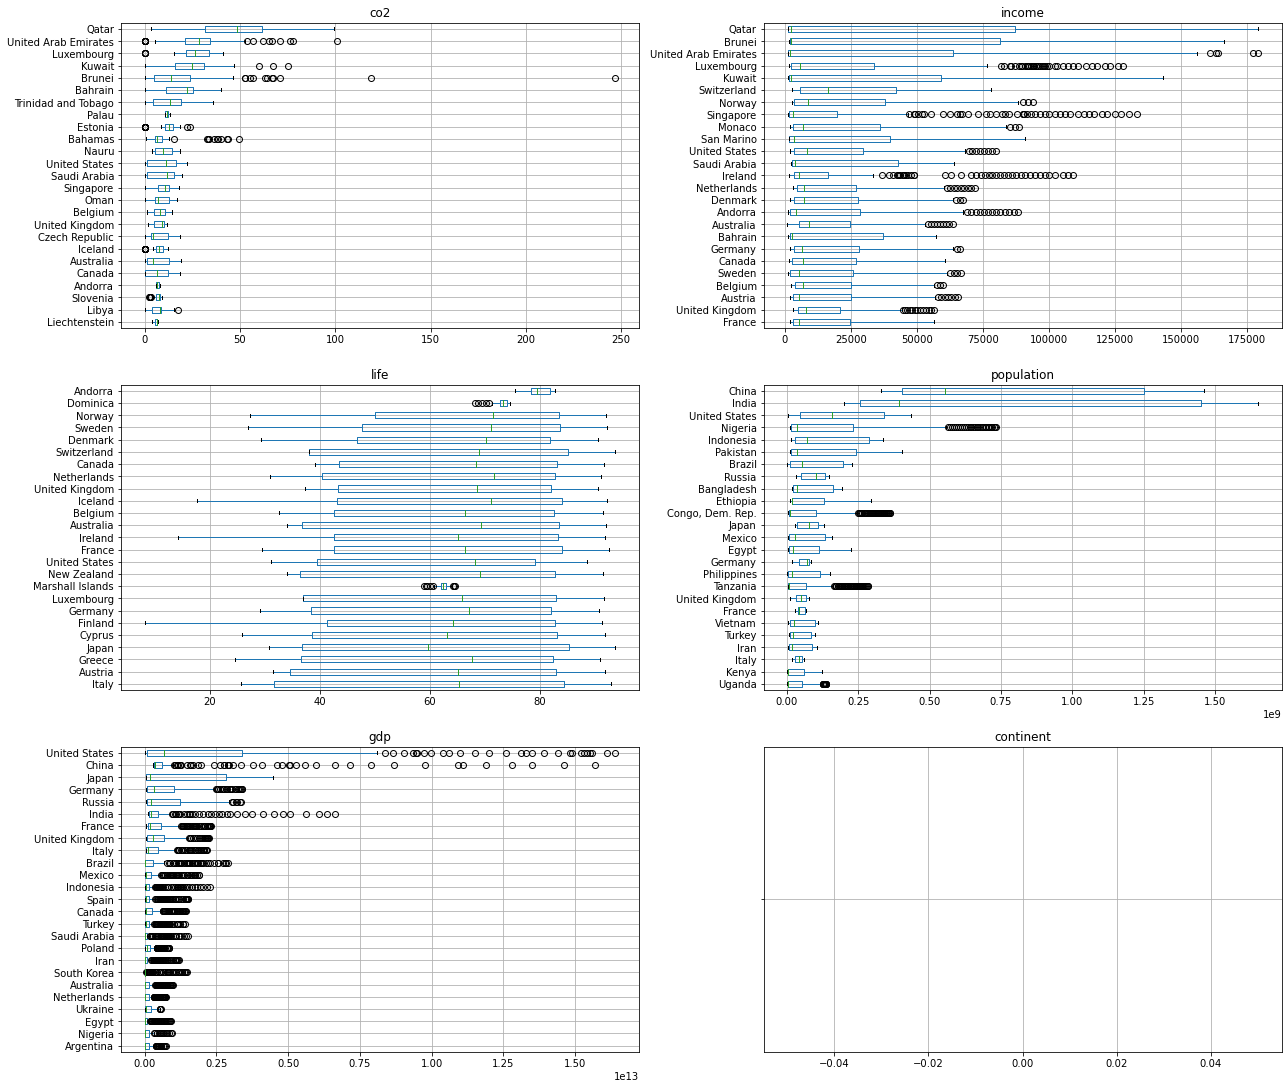

In [23]:
plt.figure(figsize=(18, 50), tight_layout=True)

for num, name_df in enumerate(all_data.items(), start=1):
    name, df = name_df
    plt.subplot(10,2,num)
    plt.tight_layout()
    
    df[top_25_columns[name]].boxplot(vert=False)
    plt.title(name)
  

### What are the relatonships between the various indicators?

In order to plot the variables in a correlation coefficient heat map so we can see a highly correlated variable to the other we need to first group the data into means and putting it into its own statistics dataframe. 



### finding the means

In [24]:
# Want to find the averages of all the indicators and plot them and then generate a stats dataframe

means = {name:df.mean() for name, df in all_data.items()}
means['continent'] = continents['Continent']
means = pd.DataFrame(means)
means.sample(n=5)

co2   income  life    population                gdp continent
Poland   3.85 8,506.64 58.71 25,580,830.56 155,076,635,514.02    Europe
Djibouti 0.66 2,094.41 49.63    468,277.74     349,731,308.41    Africa
Thailand 1.31 4,585.45 54.37 31,414,584.72  99,326,915,887.85      Asia
Bhutan   0.47 2,587.73 50.59    484,963.46     444,895,327.10      Asia
Uganda   0.07   985.18 44.68 32,339,966.78   5,782,990,654.21    Africa

### correlation matrix

Run correlation matrix to see how closely related the indicators are


In [25]:
corr = means.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Itertools

We use the itertools module in python, to loop over the various combinations which have a positive coefficient and plot them along with a regularly fitting curve to show which variables indicate a possible or near relationship.   

Without making difinitive assumptions about the data, we only want to visualize the possoble relationships so we can make some kind of indication on our own how these possible indicators may impact eachother. By plotting the relationships, you can also see the skewness in the points and for think about what posssible outliers exist.

In [26]:
means.continent

Afghanistan             Asia
Albania               Europe
Algeria               Africa
Andorra               Europe
Angola                Africa
                   ...      
Venezuela      South America
Vietnam                 Asia
Yemen                   Asia
Zambia                Africa
Zimbabwe              Africa
Name: continent, Length: 216, dtype: object

co2 income


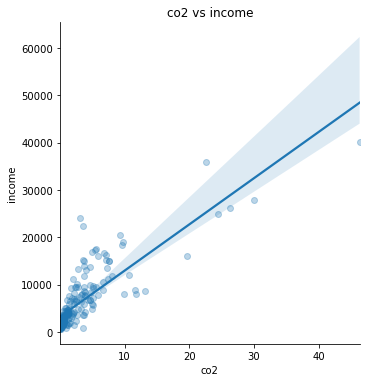

co2 life


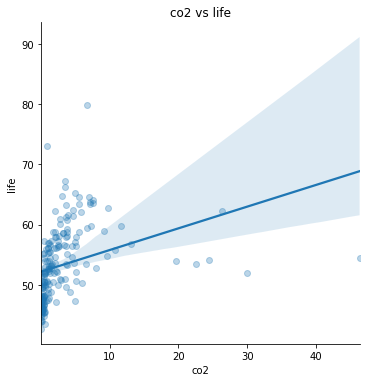

co2 population


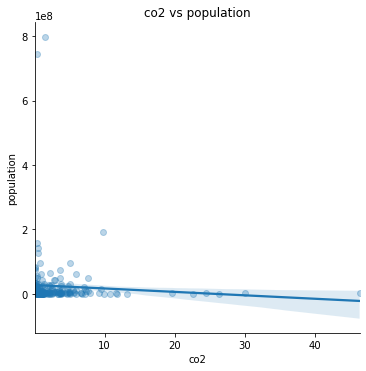

co2 gdp


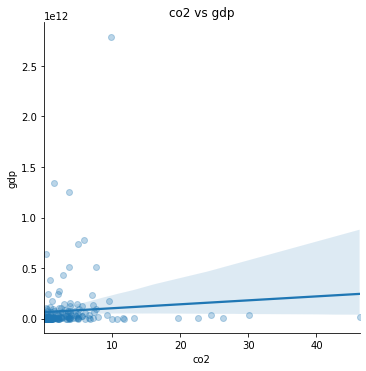

income life


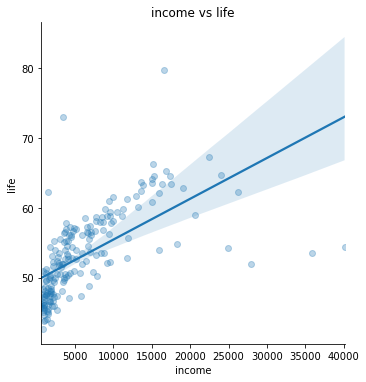

income population


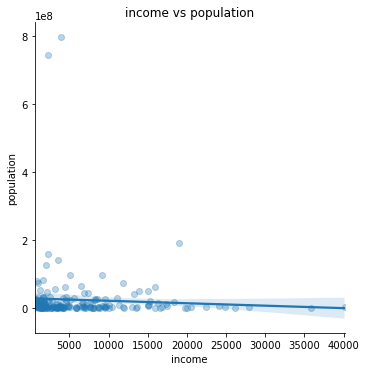

income gdp


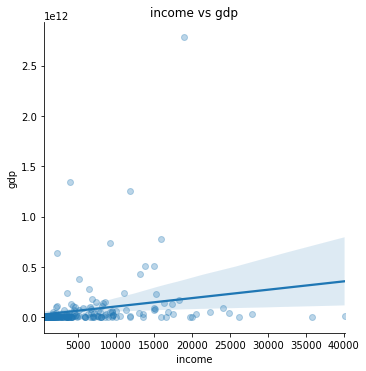

life population


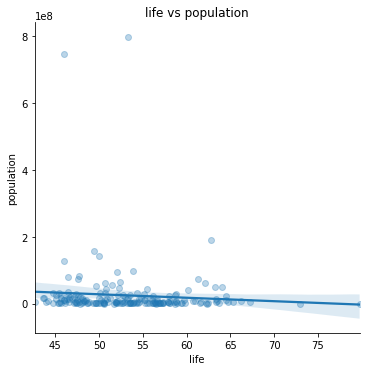

life gdp


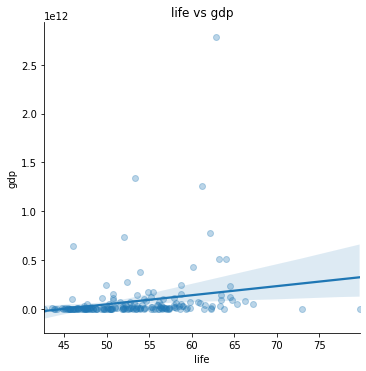

population gdp


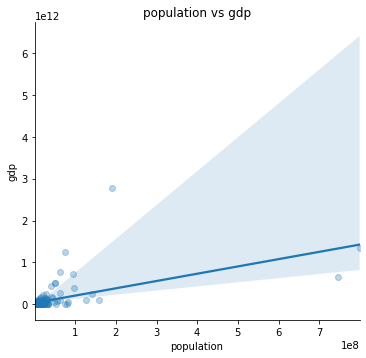

In [27]:
for name1, name2 in itertools.combinations(all_data, 2):
    #plt.figure()
    if "continent" in (name1, name2):
        continue
    print(name1, name2)
    sns.lmplot(x=name1, y=name2, data=means, scatter_kws={'alpha':0.3})
    #plt.scatter(means[name1], means[name2])
    #plt.xlabel(name1)
    #plt.ylabel(name2)
    plt.title(f"{name1} vs {name2}")
    plt.show()

### grouped analysis by continental or econic region
A further analaysis could be made by continent and economic region.. 

In [28]:
# Once data has a column that you can group on (categorical data)
category_column = 'continent'
#unique_group_names = means[category_column].unique() #['asia', 'europe', 'north america', .e..] # dataframe[category_column].unique()

means.groupby(category_column).mean() # For each group (e.g. continent), generate the group mean

co2    income  life    population                gdp
continent                                                          
Africa        0.81  2,254.09 48.32 17,583,126.60  13,020,080,268.93
Asia          5.97  8,693.91 51.96 64,927,276.17 130,028,426,139.28
Europe        4.63 11,442.06 60.21  9,733,677.60  89,904,554,434.61
North America 2.87  5,396.84 55.62  6,875,999.56  33,205,514,318.21
Oceania       3.12  4,837.50 52.13  1,860,593.01  13,152,763,290.91
South America 1.72  5,339.23 55.11 17,229,357.92  65,002,397,468.85

# Visualization of Data

## Plotly scatter plots

We will fist plot the means after importing the module plotly module to produce various figures to represent the data

In [29]:
import plotly.express as px

plot_means = means.reset_index().rename(columns={'index':'country'}).dropna()

### Figure 1: Total CO2 consumption on the virtical axis, with population represented by the size of the bubble 

In [30]:

fig = px.scatter(
    plot_means,
    x="population",
    y="gdp", 
    size="co2", #np.sqrt(plot_means["gdp"]), 
    size_max = 40,
    color="continent", 
    hover_name="country", 
    log_y=True, 
    log_x=True,
title="Total CO2 emissions per capita v. GDP (bubble Size = Population)")
fig.show()

### Figure 2: Total CO2 consumption on the virtical axis, with population represented by the size of the bubble 

In [31]:
fig1 = px.scatter(combined.query("year == '2010'").query("continent in ('North America', 'South America', 'Asia', 'Euope')").dropna(), x="gdp", y="co2",
                size="population", 
                color="co2",
                hover_name="country", log_x=True, size_max=50,

title="CO2 per capita v number of passangers per capita (bubble size = number of carrier departures)")
fig1.show()

### Figure 3: Total CO2 consumption on the virtical axis, with population represented by the size of the bubble 

In [32]:
fig3 = px.scatter(combined.query("year in ('2003')").dropna(), x="gdp", y="co2",
                size="co2", 
                color="continent",
                hover_name="country", log_x=True, size_max=60,
title="CO2 per capita v GSP (bubble size = consumption)")
fig3.show()

<a id='conclusions'></a>
## Conclusions

In this project we investigating CO2 emissions data provided by Gapminder and explore data sets of other know indicators such as life expectancy, population, gdp, and, income and compare those to flight data as provided by Gapminder to help us understand how known indicators of CO2 emissions may also influence our behavior of flying leading to aerospace industries contribution to the to overall global CO2 emissions. 

In conclusion about the GapMider data set exploration - without implying causation from correlation - we can conclude that various drivers and directly related variables such as Population, Life Expectancy, Income and GDP show have an impact on the amount of CO2 (per capita) a country emits.


### Results: 

> 1. The data suggest there is certainly a connection between the known variables Population, Life Expectancy, Income and GDP  with the amount of CO2 is emmitted per capita per country
> 2. The data also suggests that many other factors along with those knows drivers used in the analysis such as the various types of industry, energy prodcyiton or deforestation (logging / forestry industry) all would likely show similar relationships as the ones selected in this project. 
> 3. All variable inscluding flights and carrier flights trend in the same direction as other drivers such as income, and GDP. therefore the data could suggest that behavior is also a driving force as higher income, life expectency. etc. tend to result in higher number of passanger glights in general as shown in Figure 3 

### Limitations: 

> 1. Limitations exist due to the categorical nature of the dates when analyzing the data. Therefore we cannot have a very high level of statistical methodoology can be used other than basic correlations to showcase the nature of the potential relationshios between the variables.  
> 2. Another clear limitation is the fact that countries all develope at different rates as well as have cyclical data when it comes to merging developing countries causing an incocistancy when looking at regions which may not be equal when it comes to their economic impact or regional development. 
> 3. We can make staticis used here are descriptive statistics instead of inferential which would require a more scientific approach using a controlled experiments with a hypothesis rather than the exploritory inferences we make with our data. 

In [33]:
plotly.offline.init_notebook_mode()